In [1]:
import pandas as pd
from tqdm import tqdm
import regex as re
import nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from nltk import sent_tokenize, word_tokenize

In [2]:
df = pd.read_csv("../data/labeledTrainData.tsv", sep='\t')
len(df)

25000

In [175]:
words = ['dont', 'waste', 'time']
allowed = {'JJ', 'RB'}

tags = nltk.pos_tag(words)
print(tags)
a = list(filter(lambda x: x[1] in allowed, tags))
fwords, ftags = zip(*a)
print(fwords)
print(ftags)

[('dont', 'JJ'), ('waste', 'NN'), ('time', 'NN')]
('dont',)
('JJ',)


In [4]:
all_grams = []
allowed_tags = {'JJ', 'JJ NN', 'JJ NNS', 'JJ NN NN', 'RB JJ NN', 'JJ TO VB', 'VB JJ NN'}
banned_words = {'', 'br'}

def filter_banned_words(words, banned_words):
    filtered_words = list(filter(lambda x: x not in banned_words, words))
    
    return filtered_words

def merge_n_grams(ngrams, ntags):
    merged_n_grams = []
    merged_n_tags = []
    
    for ngram, ntag in zip(ngrams, ntags):
        merged_n_grams.append(' '.join(ngram))
        merged_n_tags.append(' '.join(ntag))
        
    return merged_n_grams, merged_n_tags

def filter_by_tags(ngrams, ntags, allowed_tags):
    pos = zip(ngrams, ntags)
    
    filtered_pos = list(filter(lambda x: len(x[0]) > 1 and x[1] in allowed_tags, pos))
    
    # filtered tags and words
    filtered_words = [word for word, tag in filtered_pos]
    filtered_tags = [tag for word, tag in filtered_pos]
    
    return filtered_words, filtered_tags

def generate_words_and_tags(review):
    sentences = sent_tokenize(review)
    
    # pos tagging and filtering
    pos_tags = []
    for sentence in sentences:
        split_words = [re.sub(r"\p{P}+", "", x).lower() for x in sentence.split()]
        words = filter_banned_words(split_words, banned_words)
        pos_tags.extend(nltk.pos_tag(words))
    
    # split words and tags
    words = [word.lower() for word, tag in pos_tags]
    tags = [tag for word, tag in pos_tags]
    
    return words, tags

def generate_n_grams(words, tags, n=1):
    if n == 1:
        ngrams, ntags = filter_by_tags(words, tags, allowed_tags)
    elif n == 2:
        bigrams = zip(words, words[1:])
        bitags = zip(tags, tags[1:])
        
        mbigrams, mbitags = merge_n_grams(bigrams, bitags)
        ngrams, ntags = filter_by_tags(mbigrams, mbitags, allowed_tags)
    elif n == 3:
        trigrams = zip(words, words[1:], words[2:])
        tritags = zip(tags, tags[1:], tags[2:])

        mtrigrams, mtritags = merge_n_grams(trigrams, tritags)
        ngrams, ntags = filter_by_tags(mtrigrams, mtritags, allowed_tags)
    
    return ngrams, ntags

In [5]:
unigrams = []
bigrams = []
trigrams = []
all_grams = []

for i in tqdm(range(len(df))):
    words, tags = generate_words_and_tags(df.iloc[i]['review'])
    
    unigrams.extend(generate_n_grams(words, tags, 1)[0])
    bigrams.extend(generate_n_grams(words, tags, 2)[0])
    trigrams.extend(generate_n_grams(words, tags, 3)[0])

100%|██████████| 25000/25000 [08:46<00:00, 47.47it/s]


In [6]:
print(len(unigrams))
print(len(bigrams))
print(len(trigrams))

539649
331324
81638


In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

1764


Text(0.5,0,'Unigram counts')

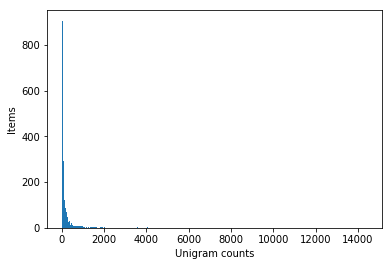

In [8]:
unigram_counts = [x for x in list(Counter(unigrams).values()) if x > 30]
print(len(unigram_counts))
plt.hist(unigram_counts, bins=300)
plt.ylabel('Items')
plt.xlabel('Unigram counts')

6246


Text(0.5,0,'Bigram counts')

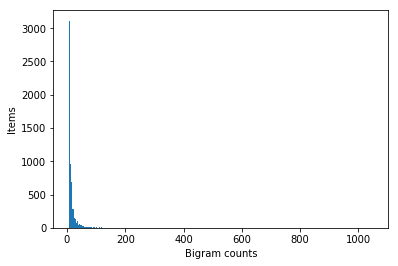

In [9]:
bigram_counts = [x for x in list(Counter(bigrams).values()) if x > 5]
print(len(bigram_counts))
plt.hist(bigram_counts, bins=300)
plt.ylabel('Items')
plt.xlabel('Bigram counts')

1700


Text(0.5,0,'Trigram counts')

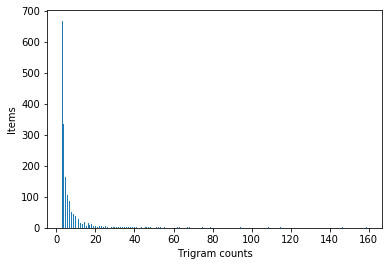

In [10]:
trigram_counts = [x for x in list(Counter(trigrams).values()) if x > 2]
print(len(trigram_counts))
plt.hist(trigram_counts, bins=300)
plt.ylabel('Items')
plt.xlabel('Trigram counts')

In [11]:
allowed_unigrams = {word : count for word, count in list(Counter(unigrams).items()) if count > 30}
allowed_bigrams = {word : count for word, count in list(Counter(bigrams).items()) if count > 5}
allowed_trigrams = {word : count for word, count in list(Counter(trigrams).items()) if count > 2}

filtered_unigrams = [x for x in unigrams if x in allowed_unigrams]
filtered_bigrams = [x for x in bigrams if x in allowed_bigrams]
filtered_trigrams = [x for x in trigrams if x in allowed_trigrams]

all_grams = []
all_grams.extend(filtered_unigrams)
all_grams.extend(filtered_bigrams)
all_grams.extend(filtered_trigrams)

In [12]:
from collections import Counter

counts = Counter(all_grams)

In [13]:
counts.most_common(5000)

[('good', 14415),
 ('other', 8911),
 ('bad', 8886),
 ('great', 8841),
 ('first', 6641),
 ('many', 6575),
 ('<br', 5990),
 ('little', 5869),
 ('much', 5810),
 ('real', 4508),
 ('new', 4225),
 ('such', 4164),
 ('few', 4044),
 ('old', 4019),
 ('same', 4002),
 ('><br', 3625),
 ('young', 3582),
 ('funny', 3426),
 ('big', 3325),
 ('original', 3264),
 ('only', 3202),
 ('own', 3125),
 ('last', 2877),
 ('whole', 2771),
 ('ive', 2553),
 ('different', 2341),
 ('main', 2248),
 ('true', 2224),
 ('interesting', 2157),
 ('hard', 2020),
 ('american', 2018),
 ('special', 2014),
 ('beautiful', 1956),
 ('sure', 1922),
 ('excellent', 1905),
 ('nice', 1888),
 ('black', 1862),
 ('high', 1859),
 ('long', 1829),
 ('poor', 1826),
 ('second', 1682),
 ('short', 1645),
 ('wrong', 1617),
 ('full', 1617),
 ('dead', 1594),
 ('classic', 1579),
 ('small', 1574),
 ('terrible', 1561),
 ('wonderful', 1554),
 ('stupid', 1539),
 ('next', 1502),
 ('awful', 1481),
 ('entire', 1459),
 ('human', 1430),
 ('>the', 1412),
 ('seve

In [14]:
counts.most_common()[-100:]

[('ready to write', 3),
 ('really cool zombie', 3),
 ('lazy sunday afternoon', 3),
 ('not much dialogue', 3),
 ('very different way', 3),
 ('unable to explain', 3),
 ('just enough money', 3),
 ('very funny<br ><br', 3),
 ('really good action', 3),
 ('sad to watch', 3),
 ('first horror movie', 3),
 ('very sad story', 3),
 ('perfect family film', 3),
 ('wong kar wai', 3),
 ('many horror film', 3),
 ('rare blood type', 3),
 ('guilty to be', 3),
 ('very little variation', 3),
 ('once again<br ><br', 3),
 ('other vampire movie', 3),
 ('horrible movie experience', 3),
 ('willing to work', 3),
 ('hard to deny', 3),
 ('numerous to list', 3),
 ('good b movie', 3),
 ('modern film noir', 3),
 ('low budget work', 3),
 ('able to project', 3),
 ('very talented actress', 3),
 ('necessary to tell', 3),
 ('ill admit i', 3),
 ('entire world<br ><br', 3),
 ('willing to settle', 3),
 ('real estate office', 3),
 ('ready to watch', 3),
 ('ready to do', 3),
 ('good way<br ><br', 3),
 ('young scarlett johanss

In [15]:
DIRECTORY = '/mnt/c/Users/gvs/ubuntu/neural-review-summarization/output/'
FILE_NAME = 'important_phrases.csv'
UNIGRAMS_FILE = 'unigrams.csv'
BIGRAMS_FILE = 'bigrams.csv'
TRIGRAMS_FILE = 'trigrams.csv'

In [16]:
n_gram_counts = [Counter(filtered_unigrams), Counter(filtered_bigrams), Counter(filtered_trigrams)]
N_GRAM_FILES = [UNIGRAMS_FILE, BIGRAMS_FILE, TRIGRAMS_FILE]

In [17]:
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df = df.rename(columns={'index':'Phrase', 0:'Count'})

In [18]:
df.to_csv(DIRECTORY + FILE_NAME, encoding='utf-8')

In [19]:
for i in range(len(N_GRAM_FILES)):
    n_gram_file = N_GRAM_FILES[i]
    n_gram_count = n_gram_counts[i]
    
    n_gram_df = pd.DataFrame.from_dict(n_gram_count, orient='index').reset_index()
    n_gram_df = n_gram_df.rename(columns={'index':'Phrase', 0:'Count'})
    n_gram_df.to_csv(DIRECTORY + n_gram_file, encoding='utf-8')    

In [20]:
df = pd.read_csv(DIRECTORY + FILE_NAME)
unigram_df = pd.read_csv(DIRECTORY + UNIGRAMS_FILE)
bigram_df = pd.read_csv(DIRECTORY + BIGRAMS_FILE)
trigram_df = pd.read_csv(DIRECTORY + TRIGRAMS_FILE)

In [21]:
import numpy as np

def load_glove_model(glove_file):
    print("Loading Glove Model")
    with open(glove_file,'r') as f:
        model = {}
        for line in tqdm(f):
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            model[word] = embedding
            
    print("Done.",len(model)," words loaded!")
    return model

In [22]:
GLOVE_DIR = '/home/gvs/neural-review-summarization/model/embeddings/'
GLOVE_FILE = 'glove.6B.300d.txt'
glove = load_glove_model(GLOVE_DIR + GLOVE_FILE)

698it [00:00, 6978.18it/s]

Loading Glove Model


400000it [00:59, 6724.44it/s]

Done. 400000  words loaded!


In [23]:
from sklearn.preprocessing import normalize

def vectorize_phrase(string_phrase, emb_size=300):
    emb_sum = None
    keys = string_phrase.split()
    
    all_in_glove = True
    
    for key in keys:
        if key not in glove:
            all_in_glove = False
            break
    
    if all_in_glove:
        emb_sum = np.zeros(emb_size)
        
        for key in keys:
            vec = glove[key]
            emb_sum += vec

        emb_sum /= len(keys)
        emb_sum = normalize(emb_sum[:,np.newaxis], axis=0).ravel()
    
        """
        norm = np.linalg.norm(emb_sum)
        if norm!=0:
            emb_sum /= np.linalg.norm(norm)
        """
    
    return emb_sum
    
emb_size = len(glove['hi'])

def generate_phrase_meanings(df, emb_size=300):
    meanings = []
    meaning_labels = []
    for i in tqdm(range(len(df))):    
        string_phrase =  df.iloc[i]['Phrase']

        vectorized_phrase = vectorize_phrase(string_phrase, emb_size=emb_size)

        if vectorized_phrase is not None:
            meaning_labels.append(string_phrase)
            meanings.append(vectorized_phrase)
    
    return meanings, meaning_labels

In [24]:
meanings, meaning_labels = generate_phrase_meanings(df, emb_size=emb_size)
uni_meanings, uni_meaning_labels = generate_phrase_meanings(unigram_df, emb_size=emb_size)
bi_meanings, bi_meaning_labels = generate_phrase_meanings(bigram_df, emb_size=emb_size)
tri_meanings, tri_meaning_labels = generate_phrase_meanings(trigram_df, emb_size=emb_size)

100%|██████████| 1700/1700 [00:00<00:00, 2729.79it/s]


In [26]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from scipy import spatial

first_example = 0
second_example = 4
print(df.iloc[first_example])
print(df.iloc[second_example])

print(1 - spatial.distance.cosine(meanings[first_example], meanings[second_example]))

Unnamed: 0            0
Phrase        close ups
Count                22
Name: 0, dtype: object
Unnamed: 0             4
Phrase        box office
Count                 17
Name: 4, dtype: object
0.331960795952


In [27]:
print(len(meanings))
print(len(uni_meanings))
print(len(bi_meanings))
print(len(tri_meanings))

9307
1693
6002
1612


In [193]:
meanings_matrix = 1 - cosine_distances(meanings)

In [194]:
meanings_matrix[0][0]

1.0

In [195]:
from sklearn import cluster

def cluster_meanings(meanings):
    #k = 300
    #cl = cluster.AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='average')
    #cl = cluster.KMeans(n_clusters=k, max_iter=300, n_init=25, n_jobs=2, verbose=1)
    #cl = cluster.DBSCAN(algorithm='auto', eps=0.2, leaf_size=20, min_samples=3, metric='cosine')
    cl = cluster.AffinityPropagation(damping=0.9, max_iter=2000, convergence_iter=1000, preference=None, affinity='precomputed', verbose=True)
    cl.fit_predict(meanings_matrix)
    
    return cl

In [196]:
cl = cluster_meanings(meanings)

Converged after 1435 iterations.


In [197]:
labels = cl.labels_
k = len(list(set(labels)))
print(k)
print(len(labels))
print(len(meaning_labels))

871
9307
9307


In [198]:
def print_phrase_and_clusters(phrases, cluster_labels, show=1000):
    for i in range(show):
        print(phrases[i], cluster_labels[i])
        
def generate_cluster_examples(meaning_labels, cluster_labels):
    cluster_examples = {}

    for i in range(len(cluster_labels)):
        if cluster_labels[i] not in cluster_examples:
            cluster_examples[cluster_labels[i]] = []

        cluster_examples[cluster_labels[i]].append(meaning_labels[i])
        
    return cluster_examples
        
def print_clusters_examples(cluster_examples, cluster_counts, k, show=30):
    for pair in cluster_counts.most_common(k):
        cluster_label, _ = pair

        print("\nPrinting examples for cluster {}:".format(cluster_label))

        size = min(show, len(cluster_examples[cluster_label]))
        for i in range(size):
            print(cluster_examples[cluster_label][i])

In [200]:
cluster_counts = Counter(labels)
print(cluster_counts.most_common(k))

cluster_examples = generate_cluster_examples(meaning_labels, labels)

print_clusters_examples(cluster_examples, cluster_counts, k)

[(815, 124), (456, 98), (740, 95), (528, 89), (443, 72), (41, 70), (370, 69), (191, 67), (632, 61), (227, 57), (479, 56), (63, 55), (619, 55), (635, 54), (392, 53), (472, 53), (94, 52), (466, 51), (858, 51), (119, 50), (190, 49), (623, 48), (589, 45), (650, 41), (125, 40), (155, 40), (53, 39), (505, 39), (659, 39), (260, 38), (355, 38), (591, 38), (59, 37), (400, 37), (406, 37), (427, 37), (256, 36), (329, 36), (756, 36), (33, 35), (442, 35), (800, 35), (825, 35), (835, 35), (782, 34), (71, 32), (323, 32), (511, 32), (540, 32), (616, 32), (22, 31), (816, 31), (13, 30), (65, 30), (103, 30), (234, 30), (373, 30), (486, 30), (734, 30), (95, 29), (585, 29), (720, 29), (200, 28), (363, 28), (457, 28), (476, 28), (482, 28), (710, 28), (28, 27), (56, 27), (450, 27), (581, 27), (598, 27), (667, 27), (395, 26), (578, 26), (117, 25), (338, 25), (439, 25), (110, 24), (166, 24), (714, 24), (219, 23), (251, 23), (399, 23), (674, 23), (776, 23), (798, 23), (112, 22), (173, 22), (320, 22), (347, 22),

thankless role
cameo role
straight role
responsible
difficult role
same role
famous role
small role
first role
female role model
great role
very early role
early role
supporting role
good role
last role
dual role
very different role

Printing examples for cluster 286:
entire audience
entire point
entire premise
entire show
entire
entire community
entire body
entire run
entire picture
entire life
entire family
entire planet
entire production
entire thing
entire population
entire running
entire time
intact
entire crew

Printing examples for cluster 319:
half hour i
half way
half
last hour
first half
second hour
first minutes
latter half
half dozen
next hour
first half hour
first hour
first minute
half hours
rush hour
final half hour
full half hour
half hour
last minute

Printing examples for cluster 409:
great tv
other viewers
good tv
other television
straight to tv
local tv station
other tv
original tv
local tv
local television station
white tv
other show
local television
old tv show
ot

unemployed
disabled
elderly
troubled man

Printing examples for cluster 558:
secret government
secret sunshine
secret lives
secret life
secret weapon
secret service
secret government computer
secret
secret mission
secret service agent

Printing examples for cluster 620:
pretty
damn
so damn boring
whole damn
darn
damn thing
damned
pretty damn
darn thing
lousy

Printing examples for cluster 656:
robert taylor
robert wagner
robert blake
robert carlyle
robert downey jr
billy sunday robert
robert downey
robert
robert altman
robert stack

Printing examples for cluster 679:
gus van
van damme
van der beek
dick van dyke
brian van holt
dick van
van der
casper van dien
van
gus van sant

Printing examples for cluster 726:
central performance
central idea
central character
central park
central theme
central focus
central role
central figure
central message
central

Printing examples for cluster 729:
formulaic
taut
sentimental
uplifting
hammy
sappy
suspenseful
contrived
melodramatic
campy

Printing 

pearl harbor

Printing examples for cluster 48:
international film
international pictures
international
international film festival

Printing examples for cluster 55:
modesty blaise
modesty blaise movie
modesty blaise character
modesty

Printing examples for cluster 64:
presidential candidate
manchurian candidate
presidential
presidential palace

Printing examples for cluster 74:
maureen stapleton
maureen
thelma ritter
cathy moriarty

Printing examples for cluster 77:
liberal
radical
conservative
liberal use

Printing examples for cluster 78:
good car chase
chase
chase scene
chevy chase

Printing examples for cluster 86:
odd couple
odd choice
odd parents
odd

Printing examples for cluster 87:
edward g
edward
gram parsons
edward g robinson

Printing examples for cluster 90:
israeli
egyptian
jewish
arab

Printing examples for cluster 101:
mixed
mixed reviews
mixed feelings
mixed bag

Printing examples for cluster 108:
quiet
quiet life
deserted
calm

Printing examples for cluster 109:
mic

In [201]:
print_phrase_and_clusters(meaning_labels, labels)

close ups 295
faithful adaptation 673
id heard 741
difficult time 392
box office 795
real friends 632
dry eye 606
new apartment 41
central performance 726
mel brooks 587
puppy 428
much science fiction 60
same tone 256
veteran 464
new kind 41
strange 714
straight face 822
timothy hines 134
write 392
worst movie 0
chronological order 437
enough to give 486
classic scene 438
rosemary lane 751
unusual 210
bunny foo foo 417
historic 861
sweet love story 468
villainous 711
unrated version 149
technical side 4
doesnt matter 1
lex luthor 2
only other thing 619
good kind 740
dimensional 3
young mr lincoln 472
strong message 447
favourite actors 817
impossible to get 392
willing to sit 589
skinny 501
only scene 173
young john wayne 193
technical 4
first guy 200
whole thing i 619
public domain 124
southern drawl 365
napoleon dynamite 186
small 5
sexual assault 576
fantastic i 260
last scene i 591
accessible 804
mary lou prom 296
wonderful characters 400
second renaissance 659
last quarter 505
civ

In [202]:
DIRECTORY = '/mnt/c/Users/gvs/ubuntu/neural-review-summarization/model/'
KMEANS_MODEL_FILE = "k_means_model.pkl"

In [203]:
PHRASE_KEY = 'Phrase'
LABEL_KEY = 'Label'
LIST_ID_KEY = 'List Id'
AFFINITY_CLUSTER_CENTERS = 'cluster_centers.csv'
AFFINITY_CLUSTER_LABELS = 'phrase_cluster_labels.csv'

def save_affinity_model(meaning_labels, labels, cluster_center_indices, directory, cluster_centers_file, cluster_labels_file):
    phrase_cluster_labels_df = pd.DataFrame(list(zip(meaning_labels, labels)), columns=[PHRASE_KEY, LABEL_KEY])
    cluster_centers = [(center, meaning_labels[center], labels[center]) for center in cl.cluster_centers_indices_]
    cluster_centers_df = pd.DataFrame(cluster_centers, columns=[LIST_ID_KEY, PHRASE_KEY, LABEL_KEY])
    
    phrase_cluster_labels_df.to_csv(directory + cluster_labels_file, encoding='utf-8', index=False)
    cluster_centers_df.to_csv(directory + cluster_centers_file, encoding='utf-8', index=False)
    
    return phrase_cluster_labels_df, cluster_centers_df

In [204]:
import pickle

phrase_cluster_labels_df, cluster_centers_df = save_affinity_model(meaning_labels, labels, cl.cluster_centers_indices_, 
                                                                   DIRECTORY, AFFINITY_CLUSTER_CENTERS, AFFINITY_CLUSTER_LABELS)

"""
with open(DIRECTORY + AFFINITY_MODEL_FILE, 'wb') as model_file:
    pickle.dump(cl, model_file, protocol=pickle.HIGHEST_PROTOCOL)
    print('model saved')
"""

"\nwith open(DIRECTORY + AFFINITY_MODEL_FILE, 'wb') as model_file:\n    pickle.dump(cl, model_file, protocol=pickle.HIGHEST_PROTOCOL)\n    print('model saved')\n"

In [205]:
phrase_cluster_labels_df = pd.read_csv(DIRECTORY + AFFINITY_CLUSTER_LABELS)
cluster_centers_df = pd.read_csv(DIRECTORY + AFFINITY_CLUSTER_CENTERS)

In [207]:
all_cluster_centers = list(cluster_centers_df[PHRASE_KEY])
all_cluster_center_meanings = [vectorize_phrase(cluster_center_phrase, emb_size=emb_size) for cluster_center_phrase in tqdm(all_cluster_centers)]

100%|██████████| 871/871 [00:00<00:00, 1376.08it/s]


In [206]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(metric='cosine').fit(np.array(all_cluster_center_meanings))
#neigh.kneighbors([vectorize_phrase("great movie", emb_size=emb_size)], return_distance=False)

In [208]:
test_df = pd.read_csv("../data/test_midnight_cowboy.tsv", sep='\t', encoding='latin-1')

In [209]:
test_unigrams = []
test_bigrams = []
test_trigrams = []

for i in tqdm(range(len(test_df))):
    words, tags = generate_words_and_tags(test_df.iloc[i]['review'])
    
    test_unigrams.extend(generate_n_grams(words, tags, 1)[0])
    test_bigrams.extend(generate_n_grams(words, tags, 2)[0])
    test_trigrams.extend(generate_n_grams(words, tags, 3)[0])

100%|██████████| 80/80 [00:02<00:00, 28.70it/s]


In [217]:
test_all_grams = []
test_all_grams.extend(test_unigrams)
test_all_grams.extend(test_bigrams)
test_all_grams.extend(test_trigrams)

test_counts = Counter(test_all_grams)
print(test_counts.most_common(40))

[('new', 108), ('new york', 83), ('other', 43), ('great', 42), ('good', 40), ('new york city', 32), ('young', 29), ('first', 27), ('many', 26), ('big', 26), ('joe', 24), ('american', 22), ('only', 22), ('late', 21), ('such', 21), ('main', 20), ('naive', 19), ('real', 19), ('same', 18), ('old', 18), ('bad', 17), ('much', 16), ('classic', 15), ('sexual', 15), ('few', 14), ('little', 14), ('top', 14), ('whole', 13), ('gritty', 13), ('joe buck', 13), ('strong', 12), ('different', 12), ('sad', 11), ('sure', 11), ('male', 11), ('true', 10), ('fine', 10), ('ratso', 10), ('excellent', 10), ('memorable', 10)]


In [218]:
"""
if cl is None:
    with open(DIRECTORY + KMEANS_MODEL_FILE, 'rb') as model_file:
        cl = pickle.load(model_file)
        print('model loaded')
"""

"\nif cl is None:\n    with open(DIRECTORY + KMEANS_MODEL_FILE, 'rb') as model_file:\n        cl = pickle.load(model_file)\n        print('model loaded')\n"

In [219]:
manual_phrases = ['fundamental problems', 'unrelenting tedium', 'most horrible blockbuster']

vectorized_phrases = []
test_labels = []

for phrase in tqdm(test_bigrams):
    vectorized_phrase = vectorize_phrase(phrase)
    if vectorized_phrase is not None:
        vectorized_phrases.append(vectorized_phrase)
        test_labels.append(phrase)

100%|██████████| 1435/1435 [00:00<00:00, 9245.14it/s]


In [220]:
#test_predictions = cl.fit_predict(test_meanings_matrix)
test_predictions = neigh.kneighbors(vectorized_phrases, return_distance=False)[:, 0]
print(test_predictions)

[ 84  84  84 ...,  69 409 435]


In [223]:
Counter(list(test_predictions)).most_common(60)

[(239, 94),
 (226, 17),
 (84, 16),
 (476, 16),
 (513, 16),
 (77, 15),
 (207, 15),
 (435, 15),
 (130, 14),
 (487, 14),
 (131, 13),
 (195, 13),
 (520, 13),
 (306, 12),
 (469, 12),
 (28, 11),
 (29, 11),
 (59, 11),
 (312, 11),
 (329, 11),
 (351, 11),
 (516, 11),
 (383, 10),
 (1, 9),
 (225, 9),
 (269, 9),
 (320, 9),
 (359, 9),
 (384, 9),
 (409, 9),
 (24, 8),
 (26, 8),
 (68, 8),
 (71, 8),
 (76, 8),
 (88, 8),
 (210, 8),
 (277, 8),
 (386, 8),
 (433, 8),
 (464, 8),
 (467, 8),
 (480, 8),
 (528, 8),
 (94, 7),
 (170, 7),
 (217, 7),
 (258, 7),
 (300, 7),
 (410, 7),
 (416, 7),
 (425, 7),
 (499, 7),
 (511, 7),
 (522, 7),
 (547, 7),
 (45, 6),
 (60, 6),
 (190, 6),
 (193, 6)]

In [224]:
good_clusters = {570, 455, 35, 190, 404, 26, 182, 281, 226, 84, 476, 207, 487, 131, 520, 469, 28, 59, 312, 329, 351, 1, 225, 269, 320, 359, 409, 24, 26, 76, 88, 210, 386, 464, 467, }
bad_clusters = {310, 337, 260, 365, 368, 435, 510, 522, 239, 513, 77, 435, 130, 195, 306, 29, 516, 383, 384, 68, 71, 277, 433,}
filtered_labels = []

for i in range(len(test_predictions)):
    test_prediction = test_predictions[i]
    
    if test_prediction in good_clusters:
        filtered_labels.append(test_labels[i])

test_labels_count = Counter(filtered_labels)
print(test_labels_count)

Counter({'first time': 10, 'main characters': 9, 'big apple': 6, 'great movie': 6, 'academy award': 6, 'main character': 4, 'whole film': 4, 'easy rider': 3, 'real world': 3, 'new life': 2, 'unusual theme': 2, 'human beings': 2, 'new world': 2, 'great performances': 2, 'true grit': 2, 'fantastic movie': 2, 'real cowboy': 2, 'big hit': 2, 'good movie': 2, 'fine film': 2, 'outstanding performances': 2, 'sexual revolution': 2, 'solid performances': 1, 'second time': 1, 'fine performances': 1, 'many victims': 1, 'sad film': 1, 'real friends': 1, 'big bucks': 1, 'prevailing theme': 1, 'new society': 1, 'sympathetic handsome': 1, 'insistent theme': 1, 'emotional response': 1, 'sexual perverts': 1, 'unpleasant story': 1, 'incredible movie': 1, 'sexual explicitness': 1, 'strong friendship': 1, 'abuse consumption': 1, 'gritty realities': 1, 'sexual insecurities': 1, 'big fuss': 1, 'wonderful film': 1, 'superb vignettes': 1, 'wonderful performances': 1, 'realistic portrait': 1, 'fellow passenger

In [216]:
clustered_predictions = {}
clustered_predictions_weights = {}

for i in range(len(test_predictions)):
    test_prediction = test_predictions[i]
    
    if test_prediction in good_clusters:
        if test_prediction not in clustered_predictions:
            clustered_predictions[test_prediction] = set()
            clustered_predictions_weights[test_prediction]= 0
        
        clustered_predictions[test_prediction].add(test_labels[i])
        clustered_predictions_weights[test_prediction] += test_labels_count[test_labels[i]]
        
print(clustered_predictions)
print(clustered_predictions_weights)

important_clusters = []
for key in clustered_predictions_weights.keys():
    important_clusters.append((clustered_predictions_weights[key], clustered_predictions[key]))

important_clusters.sort(key=lambda tup: tup[0], reverse=True)

for count, phrase_set in important_clusters:
    print('Printing the cluster with {} mentions'.format(count))
    
    for key in list(phrase_set):
        print(key)
    
    print('')

#print(important_clusters)

{320: {'great films', 'great movie', 'great cinema', 'great adventure'}, 1: {'new clothes', 'new society', 'new knowledge', 'new order', 'new culture', 'new start', 'new life', 'new way'}, 386: {'elusive comfort', 'amorous love', 'true grit', 'true genre', 'true genius', 'true nature', 'powerful love'}, 131: {'second time', 'second thoughts', 'first time', 'second disc'}, 455: {'bad luck', 'bad effect', 'bad guys', 'bad things', 'bad influences'}, 520: {'poignant issue', 'fabulous interpretation', 'interesting trivia', 'compelling story', 'sentimental story', 'discernible story', 'unique story', 'informative commentary', 'sordid storyline', 'depressing story', 'unpleasant story', 'touching story', 'fascinating midnight'}, 329: {'innate innocence', 'mild sympathy', 'strong reputations', 'blunt notion', 'strong bond', 'misguided expectation', 'unwavering sense', 'pervasive cynicism', 'assertive rejection', 'strong focusing', 'strong friendship'}, 76: {'emotional connection', 'traumatic e

In [153]:
kmeans.predict([vectorize_phrase("big apple")])

array([531], dtype=int32)